# BOUNDS AND INEQUALITIES

## SIMULATIONS

1. Generate n ∈ [1000, 100000] samples with step = 1000 from a Gaussian distribution N(0, 1).
2. For a given threshold c ∈ [0.5, 3.0] with step of 0.1, calculate the empirical probability P(X ≥
c) based on the generated samples.
3. Compare this empirical probability with the bounds provided by Markov’s inequality, Chebyshev’s
inequality, and the Chernoff bound.

1. Generate n ∈ [1000, 100000] samples with step = 1000 from a Gaussian distribution N(0, 1).

In [10]:
import numpy as np
import matplotlib.pyplot as plt
sample_size = range(1000, 10001, 1000)
samples = {n: np.random.normal(0, 1, n) for n in sample_size}   # dictionary comprehension


2. For a given threshold c ∈ [0.5, 3.0] with step of 0.1, calculate the empirical probability P(X ≥ c) based on the generated samples.

In [8]:
# calculating empherical probabilities for each sample size and threshold
thresholds = np.arange(0.5, 3.1, 0.1)
empirical_probabilities = {}
for n in sample_size:
    empirical_probabilities[n] = [(samples[n] >= c).sum() / n for c in thresholds]

3. Calculate Bounds:
    1. Markov Bound
    2. Chebyshev Bound
    3. Chernoff Bound

In [11]:
# Function to calculate Markov's inequality bound
def markov_bound(expected_value, threshold):
    return expected_value / threshold

# Function to calculate Chebyshev's inequality bound
def chebyshev_bound(var, mean, threshold):
    return var / (var + (threshold - mean)**2)

# Function to calculate Chernoff bound
def chernoff_bound(var, mean, threshold):
    return np.exp(-(threshold - mean)**2 / (2 * var))

# calculating bounds for each sample size and threshold
bounds = {}
for n in sample_size:
    mean = np.mean(samples[n])
    var = np.var(samples[n])
    bounds[n] = {
        'markov': [markov_bound(mean, c) for c in thresholds],
        'chebyshev': [chebyshev_bound(var, mean, c) for c in thresholds],
        'chernoff': [chernoff_bound(var, mean, c) for c in thresholds]
    }


4. Plot Results: Plot the empirical probability and the three bounds on the same chart using
matplotlib.

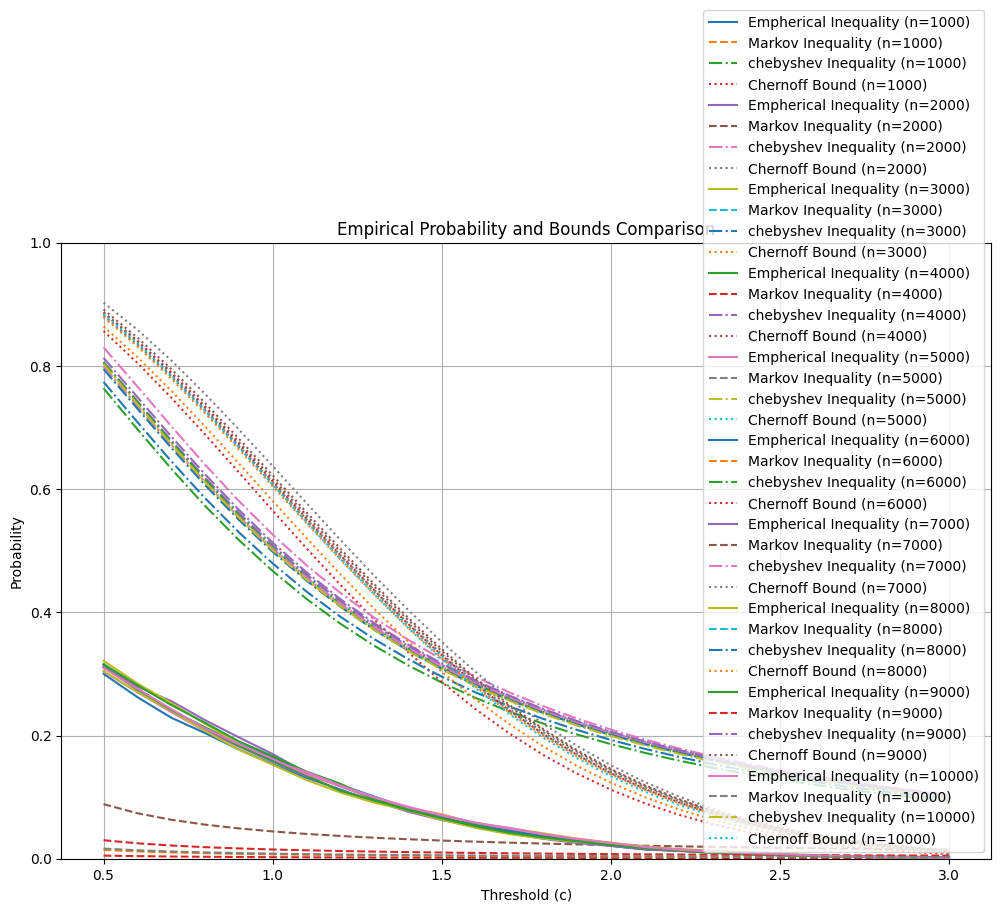

In [16]:
# Plotting the empirical probability and the three bounds
plt.figure(figsize=(12, 8))

for n in sample_size:
    plt.plot(thresholds, empirical_probabilities[n], label=f'Empherical Inequality (n={n})')
    plt.plot(thresholds, bounds[n]['markov'], linestyle='--', label=f"Markov Inequality (n={n})")
    plt.plot(thresholds, bounds[n]['chebyshev'], linestyle='-.', label=f"chebyshev Inequality (n={n})")
    plt.plot(thresholds, bounds[n]['chernoff'], linestyle=':', label=f"Chernoff Bound (n={n})")

plt.xlabel('Threshold (c)')
plt.ylabel('Probability')
plt.title('Empirical Probability and Bounds Comparison')
plt.legend()
plt.ylim(0, 1)
plt.grid(True)
plt.show()

5. **Dynamic Visualization**: Use ipywidgets to allow interactive adjustments of c and n, dynamically
updating the plot

In [17]:
import ipywidgets as widgets
from ipywidgets import interact

# Function to plot the comparison dynamically
def plot_dynamic_comparison(sample_size, threshold):
    threshold_index = np.where(np.isclose(thresholds, threshold))[0][0]
    plt.figure(figsize=(12, 8))
    plt.bar(['Empirical Probability', "Markov's Inequality", "Chebyshev's Inequality", "Chernoff Bound"],
            [empirical_probabilities[sample_size][threshold_index],
             bounds[sample_size]['markov'][threshold_index],
             bounds[sample_size]['chebyshev'][threshold_index],
             bounds[sample_size]['chernoff'][threshold_index]])
    plt.ylim(0, 1)
    plt.ylabel('Probability')
    plt.title(f'Comparison of Empirical Probability and Bounds for Sample Size {sample_size} and Threshold {threshold}')
    plt.show()
# Create interactive widgets
interact(plot_dynamic_comparison,
         sample_size=widgets.IntSlider(min=1000, max=10000, step=1000, value=10000),
         threshold=widgets.FloatSlider(min=0.5, max=3.0, step=0.1, value=1.0));

interactive(children=(IntSlider(value=10000, description='sample_size', max=10000, min=1000, step=1000), Float…

## INFERENTIAL QUESTIONS

1. Which of the three inequalities have the tightest bound for different values of c?

To determine which of the three inequalities (Markov's, Chebyshev's, or Chernoff's) provides the tightest bound for different values of \( c \), we can compare the bounds calculated for each inequality against the empirical probabilities. The tightest bound will be the one that is closest to the empirical probability for each threshold \( c \).

We can visualize this comparison using the interactive plot created in the previous cells. By adjusting the threshold \( c \) and sample size \( n \), we can observe which inequality consistently provides the tightest bound across different scenarios.


If we adjust our above widget, we see that chernoff is the most responsive bound, it is directly proportional to emphircal probability


2. How does the performmance of the bounds change as c increases?

As \( c \) increases, Chernoff's bound tends to be the most responsive and tightest, followed by Chebyshev's inequality, and then Markov's inequality. 

1. **Markov's Inequality**:
    - Markov's inequality provides a bound that is inversely proportional to \( c \). As \( c \) increases, the bound becomes tighter, but it is generally loose for small values of \( c \).

2. **Chebyshev's Inequality**:
    - Chebyshev's inequality takes into account both the mean and the variance of the distribution. As \( c \) increases, the bound becomes tighter, especially when the variance is small. However, it is still generally looser compared to Chernoff's bound for large \( c \).

3. **Chernoff Bound**:
    - Chernoff bound is exponential in nature and provides the tightest bound among the three for large values of \( c \). As \( c \) increases, the bound decreases exponentially, making it very tight for large \( c \).



### 3. What are the advantages and disadvantages of each inequality when applied to this problem

#### Markov's Inequality
**Advantages:**
- **Simplicity**: Markov's inequality is straightforward and easy to compute as it only requires the expected value of the distribution.
- **Generality**: It applies to any non-negative random variable, making it very versatile.

**Disadvantages:**
- **Looseness**: The bound provided by Markov's inequality is often very loose, especially for small values of \( c \). This can make it less useful for providing tight bounds in practice.

#### Chebyshev's Inequality
**Advantages:**
- **Incorporates Variance**: Chebyshev's inequality takes into account both the mean and the variance of the distribution, providing a tighter bound than Markov's inequality in many cases.
- **Applicability**: It applies to any random variable with a finite mean and variance, making it broadly applicable.

**Disadvantages:**
- **Still Loose**: While tighter than Markov's inequality, Chebyshev's inequality can still provide relatively loose bounds compared to more specialized inequalities like Chernoff's bound.
- **Dependence on Moments**: It requires knowledge of both the mean and the variance, which might not always be readily available.

#### Chernoff Bound
**Advantages:**
- **Tightness**: Chernoff bounds are often much tighter than both Markov's and Chebyshev's inequalities, especially for large values of \( c \).
- **Exponential Decay**: The bound decreases exponentially with \( c \), making it very effective for large deviations.

**Disadvantages:**
- **Complexity**: Chernoff bounds are more complex to compute and understand compared to Markov's and Chebyshev's inequalities.
- **Applicability**: They are typically applicable to sums of independent random variables, which might limit their use in some scenarios.

### 4. How does the sample size \( n \) affect the accuracy of the empirical probability compared to the bounds?

As the sample size \( n \) increases, the accuracy of the empirical probability tends to improve. This is because larger sample sizes provide a better approximation of the true distribution, reducing the variance of the empirical estimates. Here are some key points to consider:

1. **Law of Large Numbers**:
    - According to the law of large numbers, as the sample size \( n \) increases, the sample mean converges to the expected value. This implies that the empirical probability will become more accurate and closer to the true probability.

2. **Variance Reduction**:
    - Larger sample sizes reduce the variance of the empirical probability estimates. This means that the empirical probabilities will be less spread out and more consistent, leading to more reliable comparisons with the theoretical bounds.

3. **Comparison with Bounds**:
    - With larger sample sizes, the empirical probabilities are expected to be closer to the bounds provided by Markov's inequality, Chebyshev's inequality, and the Chernoff bound. This allows for a more accurate assessment of the tightness and applicability of these bounds.

4. **Stability**:
    - Larger sample sizes provide more stable and less noisy estimates of the empirical probabilities. This stability is crucial for making meaningful comparisons with the theoretical bounds and understanding their behavior across different thresholds \( c \).

In summary, increasing the sample size \( n \) enhances the accuracy and reliability of the empirical probability estimates, making them more comparable to the theoretical bounds. This allows for a better evaluation of the performance and tightness of Markov's, Chebyshev's, and Chernoff's inequalities.